In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib notebook

# NumPy: A look at the past, present, and future of array computation

Ross Barnowski `rossbar@berkeley.edu` | [rossbar](https://github.com/rossbar) on GitHub

University of Michigan EECS | 1/30/2020

# What is NumPy?

> *NumPy is the fundamental package for scientific computing with Python*
> 
>  [numpy.org](https://numpy.org/)

Strong stuff.

## The scientific Python ecosystem

![scientific_python_ecosystem](images/state_of_the_stack_2015.png)

Image credit: [Jake VanderPlas](http://vanderplas.com/) circa 2015

In [ ]:
# Code example: github graphql query for top starred projects with numpy as a dependency

# At a glance

![numpy_overview](images/numpy_overview_graphic.png)

Image credit: [Shaloo Shalini](https://www.linkedin.com/in/shalooshalini/): [@shaloo](https://github.com/shaloo) on GitHub

# A bit of history

 - **Mid 90's/Early 00's**: desire for high-performance numerical computation in python eventually culminates in the [`Numeric`](https://numpy.org/_downloads/768fa66c250a0335ad3a6a30fae48e34/numeric-manual.pdf) library
 - Early adopters included the [Space Telescope Science Institute (STScI)](http://www.stsci.edu/) who developed another array computation package to better suit their needs: `Numarray`.
 - **2005** The best ideas from `Numeric` and `Numarray` were combined in the development of a new library, `numpy`
   * This work was largely done by [Travis Oliphant](https://github.com/teoliphant), then an assistant professor at BYU
 - **2006** Numpy v1.0 released in October
 
[NumPy Development History](https://github.com/numpy/numpy/graphs/contributors)

# What does NumPy provide?

 - `ndarray`: A generic, n-dimensional array data structure
 - Sophisticated machinery for operating on array data
   * Powerful indexing, vectorization, broadcasting, built-in element-wise operations (`ufuncs`)
   * All features exposed by a concise, expressive syntax
 - Language extension/integration (C-API, `f2py`)
   * [Array API](https://docs.scipy.org/doc/numpy/reference/c-api.array.html) for accessing/extending array functionality in external libraries

## What else?

For historical reasons, `numpy` also includes tools for common scientific/numerical tasks:
   * Random number generation (`np.random`)
   * Fourier analysis (`np.fft`)
   * Linear algebra (`np.linalg`)

### The `scipy` package includes modules with the same name? What's the deal?

In [ ]:
import scipy, scipy.linalg

In [ ]:
print(scipy.random)
scipy.random is np.random 

In [ ]:
print(scipy.fft)
scipy.fft is np.fft

In [ ]:
print(scipy.linalg)
scipy.linalg is np.linalg

<font color="red">Check with team</font>

NumPy will continue to *support* the `fft` and `linalg` modules, but the scipy versions should probably be preferred for new code:
 - Optimizations/enhancements
 - More capabilities: e.g. see [this quick comparison](https://numpy.org/devdocs/reference/routines.linalg.html) of the `numpy` and `scipy` `linalg` modules.

# Where is NumPy used?

### <font color=red> Investigate the following for appropriately sized examples </font>

 - To produce the first image of a black hole 
   [Event Horizon Telescope Collaboration](https://github.com/achael/eht-imaging)
 - [To detect the gravitational wave signature from a neutron star merger](https://github.com/gwastro/pycbc)
 - [To discover fundamental particles like the Higgs Boson](https://github.com/cms-sw/cmssw)
   * Also [scikit-hep](https://scikit-hep.org/)
 - [Neuroimaging](https://nipy.org/nibabel/) - nipy uses `ndarray` as the fundamental structure for the entire stack
   * fMRI visualization example from [section 3.4](https://www.frontiersin.org/articles/10.3389/fninf.2014.00014/full#h4)
     is a nice, brief example

## Neuroimaging Analysis

Like much of the scientific python ecosystem, [nipy](https://nipy.org/) relies on `np.ndarray` as the fundamental structure for neuroimaging data.

The following example is adapted from [Machine learning for neuroimaging with scikit learn](https://www.frontiersin.org/articles/10.3389/fninf.2014.00014/full). The dataset used comes from the [nilearn data](https://www.nitrc.org/frs/?group_id=728).

<font color=red>**Add example of loading full Nifti image to show 4D structure of data?**</font>

In [ ]:
import nibabel   # package for loading/saving neuroimaging data
bg_img = nibabel.load('data/bg.nii.gz')
bg = bg_img.get_fdata()
type(bg)

In [ ]:
# Create activation map by thresholding the data
act_thresh = 6000
act = bg.copy()
# Set "unactivated" voxels to NaN for visualization
act[act <= act_thresh] = np.nan

In [ ]:
# imshow kwargs
imshow_opts = {
    "origin" : "lower",
    "interpolation" : "nearest"
}

# Axial slice of activation map overlay
plt.imshow(bg[...,10].T, cmap="gray");             # Background
plt.imshow(act[...,10].T, cmap="plasma");          # Activation map
plt.axis('off');

## Detecting gravitational wave signature of black hole and neutron star mergers

[PyCBC](https://pycbc.org/) is the toolkit used to analyze data from gravitational wave observatories like [LIGO](https://www.ligo.caltech.edu/) and [Virgo](http://www.virgo-gw.eu/).

The [PyCBC tutorials](https://github.com/gwastro/PyCBC-Tutorials) have some really cool examples - let's recreate the "chirp" from [first ever direct detection of gravitational waves](https://en.wikipedia.org/wiki/First_observation_of_gravitational_waves) that resulted from two black holes merging. For more info, see [the second PyCBC tutorial](https://colab.research.google.com/github/gwastro/pycbc-tutorials/blob/master/tutorial/2_VisualizationSignalProcessing.ipynb).

In [ ]:
import pycbc
from pycbc import catalog

merger_data = catalog.Merger('GW150914')
# Though the catalog includes data from multiple observatories,
# let's focus on just one
ligo_data = merger_data.strain('L1')
type(ligo_data)

`pycbc` has its own (quite extensive) API that uses `numpy` and `scipy` under the hood

In [ ]:
print(type(ligo_data._data))

In [ ]:
pycbc.types.aligned.ArrayWithAligned.__bases__

To re-create the "chirp" we have to do some analysis on the raw data. 

Let's start by applying a simple band-pass filter. This is simpler than the analysis method [used in the official pycbc tutorial](https://colab.research.google.com/github/gwastro/pycbc-tutorials/blob/master/tutorial/2_VisualizationSignalProcessing.ipynb), but works suprisingly well!

In [ ]:
# Apply a bandpass filter to the data
res = ligo_data.highpass_fir(20, 512).lowpass_fir(350, 512)

`pycbc` relies on tools in `scipy.signal` to conduct the frequency analysis.

In [ ]:
pycbc.filter.lowpass_fir??

In [ ]:
pycbc.filter.fir_zero_filter??

In [ ]:
from scipy.signal import lfilter
lfilter?

Let's take a look at the results of our filter analysis...

In [ ]:
time_of_merger = merger_data.time

# Look 500 msec-worth of data around the merger time
roi = res.time_slice(time_of_merger - 0.25, time_of_merger + 0.25)

# Similar to a spectrogram with more sophisticated, irregular sampling
times, freqs, power = roi.qtransform(
    delta_t=0.001,
    logfsteps=100,
    qrange=(8, 8),
    frange=(30, 512),
)

In [ ]:
fig, ax = plt.subplots(figsize=(6,3))
ax.pcolormesh(times, freqs, power**0.5)
ax.set_yscale('log')

# Generating the first ever direct image of a black hole

On April 10th 2019, the [Event Horizon Telescope](https://eventhorizontelescope.org/) collaboration released the [first ever image of a black hole](https://eventhorizontelescope.org/press-release-april-10-2019-astronomers-capture-first-image-black-hole):

![EHT_M87_image](https://static.projects.iq.harvard.edu/files/styles/os_files_xlarge/public/eht/files/20190410-78m-800x466.png?m=1554877319&itok=ryK319ed)

Image source: The [official blog post](https://eventhorizontelescope.org/press-release-april-10-2019-astronomers-capture-first-image-black-hole) from the EHT collaboration announcing the result

The data structure and imaging pipeline are *way* too complicated to cover in a few slides. 

Instead, we'll just take advantage of the fact that the imaging pipeline is built on the tools of the scientific python ecosystem:

![shaloo_image_dependency_graphic](images/ehtim_dependency_graphic.png)

Image credit: [Shaloo Shalini (@shaloo)](https://github.com/shaloo). For info on how this graphic was created, check out [shaloo's script](https://github.com/numpy/numpy.org/pull/23).

Let's run [the eht imaging pipeline](https://github.com/eventhorizontelescope/2019-D01-02) provided by the Event Horizons collaborators to help produce images from their [calibrated data](https://github.com/eventhorizontelescope/2019-D01-01). 

These repos with the helper-script for running the pipeline and the calibrated data have been included as submodules in `event_horizon_example/`.

In [10]:
%run event_horizons_example/2019-D01-02/eht-imaging/eht-imaging_pipeline.py -i event_horizons_example/2019-D01-01/uvfits/SR1_M87_2017_101_lo_hops_netcal_StokesI.uvfits

Loading uvfits:  event_horizons_example/2019-D01-01/uvfits/SR1_M87_2017_101_lo_hops_netcal_StokesI.uvfits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
No NX table in uvfits!
Self-calibrating the LMT to a Gaussian model for LMT-SMT...
U-V flagged 174/216 visibilities
Computing the Model Visibilities with nfft Fourier Transform...
Producing clean visibilities from image with nfft FT . . . 
Not Using Multiprocessing
Scan 20/21 : [----------------------------  ]95%

/home/ross/repos/eht-imaging/ehtim/statistics/dataframes.py:182: RuntimeWarning: invalid value encountered in double_scalars
  try: ret = np.sqrt(np.sum(x**2)/len(x)**2)



self_cal time: 0.089412 s
No Calibration  Data for PV !
Round 1: Imaging with visibility amplitudes and closure quantities...
Initializing imager data products . . .
U-V flagged 27/216 visibilities
U-V flagged 189/216 visibilities
Getting bispectra:: type vis, count min, scan 22/22 

Getting closure amps:: type vis logcamp , count min, scan 22/22

Imager run 1 
time: 0.737725 s
J: 26.884993
chi2_amp : 20.33 chi2_cphase : 1.92 chi2_logcamp : 2.56 
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
Imager run 2 
time: 0.722053 s
J: 26.062108
chi2_amp : 19.55 chi2_cphase : 1.40 chi2_logcamp : 2.50 
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
Imager run 3 
time: 0.808153 s
J: 26.109543
chi2_amp : 19.37 chi2_cphase : 1.38 chi2_logcamp : 2.50 
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
Imager run 4 
time: 0.832590 s
J: 26.116181
chi2_amp : 19.43 chi2_cphase : 1.39 chi2_logcamp : 2.50 
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
No stations specified in self cal: defaulting to calibrating all stat

See? ...It's complicated. Here's the result:

<IPython.core.display.Javascript object>


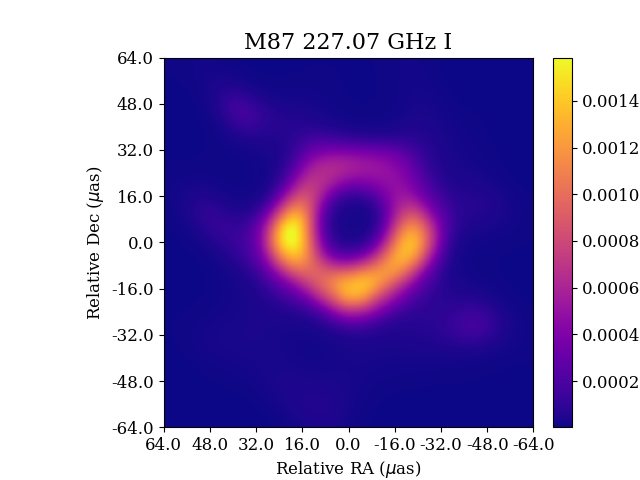

In [11]:
fig = im_out.display(cfun=plt.cm.plasma)

## Parker Solar Probe

The [Parker Solar Probe](https://www.nasa.gov/content/goddard/parker-solar-probe-humanity-s-first-visit-to-a-star) was launched in 2018 to study the solar atmosphere, coming nearer to the sun than any previous space probe. Data from the Parker probe is already yielding [unexpected results](https://news.engin.umich.edu/2019/12/were-missing-something-fundamental-about-the-sun/?utm_source=newsletter&utm_medium=email&utm_campaign=January_2020).

Full disclosure: the original analysis for the [results published in Nature](https://www.nature.com/articles/s41586-019-1813-z) were produced with IDL, not Python. However, NASA just released [the first batch of data from the probe](https://sppgway.jhuapl.edu/) to the public, so let's see if we can't replicate some results...

One of the instruments on the probe is [SWEAP](http://sweap.cfa.harvard.edu/), a set of charged-particle detectors. Publicly available data from SWEAP can be found [here](http://sweap.cfa.harvard.edu/Data.html).

### A quick aside: data formats

Data from the Parker probe is stored in NASA's [Common Data Format (CDF)](https://cdf.gsfc.nasa.gov/). Python libraries such as [spacepy](https://spacepy.github.io/) are used for I/O from the CDF format. As you might expect, `spacepy`'s `pycdf` module loads data from CDF files into NumPy arrays. Unfortunately, `spacepy`'s `pycdf` module depends on an external C-library, and there is not (yet) a `conda` recipe for installing it automatically.

To get around this I've used `spacepy.pycdf` to save a small amount of SWEAP in the more Python-friendly `.npz` format. I took data from the [SPC instrument collected on 11-08-18](http://sweap.cfa.harvard.edu/pub/data/sci/sweap/spc/L2/2018/11/). If you'd like to work with the full dataset, you can [manually install CDF](https://spacepy.github.io/install_linux.html#cdf), download the data (or any other dataset), and use `devlogs/parker_probe_velocity_log.py` as an example of how to load and interact with the raw data.

In [ ]:
# The dataset is ~150MB, so it is not included in the repo.

import os, requests, tqdm
fname = 'data/parker_probe_spcL2_data_11-08-18.npz'
dsize = 152538956   # File size in bytes
dlink = 'https://www.dropbox.com/s/z45tbkqwjpyu6tz/parker_probe_spcL2_data_11-08-18.npz?dl=0'
if not os.path.exists(fname):
    r = requests.get(
        dlink,
        headers={'user-agent':'Wget/1.20 (linux-gnu)'},
        stream=True
    )
    with open(fname, 'wb') as fh:
        for chunk in tqdm.tqdm(r.iter_content(chunk_size=1024), total=dsize/1024):
            if chunk:
                fh.write(chunk)

Now that we have the data, let's try to replicate the top pane of [this image](http://sweap.cfa.harvard.edu/Images/example_spc_ql.png) from the [SWEAP data page](http://sweap.cfa.harvard.edu/Data.html).

We don't have time to discuss the data in detail, but the [Appendix 3 of the SWEAP Data User's Guide](http://sweap.cfa.harvard.edu/sweap_data_user_guide.pdf) outlines a procedure we can use to reproduce the desired figure. We start by loading the data:

In [ ]:
# Load data from the SPC instrument on the Parker probe
data = np.load(fname)
t = data['t']          # Measurement time
# Edges of Voltage bins
mv_lo = data['mv_lo'].T
mv_hi = data['mv_hi'].T
# Differential charge flux density
dcfd = data['diff_charge_flux_density'].T

In [ ]:
# The data include timestamps with microsecond resolution
# and 128 channels per data point
print(t.shape, mv_lo.shape, dcfd.shape)
t

In [ ]:
# The CDF file uses a fill value (-1e31) to denote invalid data
print(dcfd)

In [ ]:
# Let's replace them so we can keep track of non-data in the arrays
for arr in (mv_lo, mv_hi, dcfd):
    arr[arr == -1e31] = np.nan
print(dcfd)

In [ ]:
# Upon closer inspection, only the first 30 of the 128 channels store valid data
np.sum(np.isfinite(dcfd), axis=1)

In [ ]:
# Limit computation to valid voltage bins
mv_lo, mv_hi, dcfd = mv_lo[:31,:], mv_hi[:31,:], dcfd[:31,:]

After removing the unused data channels, there are still individual measurements that resulted in invalid data. Let's remove these as well.

In [ ]:
# Mask out time samples that have bad data
bad_data = np.any(~np.isfinite(dcfd), axis=0)
t = t[~bad_data]
mv_lo = mv_lo[:, ~bad_data]
mv_hi = mv_hi[:, ~bad_data]
dcfd = dcfd[:, ~bad_data]
print("{} time samples out of {} discarded".format(bad_data.sum(), bad_data.shape[0]))

That takes care of the data munging, now on to the computation:

In [ ]:
# Compute center and widths of voltage bins
V = (mv_hi + mv_lo) / 2
dV = (mv_hi - mv_lo) / 2

In [ ]:
# Proton properties
q = 1.602e-19   # Charge [C]
mp = 1.673e-27  # Mass [kg]

In [ ]:
# N.B. scipy.special includes functions for computing the elliptic integral
# For the sake of consistency, we use the approximation as detailed in App. 3
from elliptic_integral_approximation import schlawin as elliptic

# Convert from energy -> velocity
v = np.sqrt(2 * q * mv_hi / mp) * (2 / np.pi) * elliptic(mv_lo/mv_hi)
dv = np.sqrt((4 * (q/mp) * V) - v**2)

In [ ]:
# Finally, compute the proton distribution as a function of proton velocity
Fv = (dcfd / (q* v* 10**8)) * (1 / dv)

Let's see how we did...

In [ ]:
viz_kwargs = {
    "cmap" : plt.cm.plasma,
    "norm" : colors.LogNorm(vmin=1, vmax=200)
}

In [ ]:
# Visualize
fig = plt.figure(figsize=(8,4)); ax = fig.add_subplot(111)
ax.pcolormesh(t[np.newaxis,:], v/1000, Fv, **viz_kwargs)
fig.colorbar(ax.collections[0])
fig.autofmt_xdate()

# Scope of NumPy

NumPy currently targets computation involving:

 * in-memory, homogenously-typed array data
 * cpu-based

Important guiding principles:
 - **Stability**: Foundational component of the scientific python ecosystem for going-on 15 years
 - **Interoperability**
   * NumPy is the standard array data structure within the scientific Python ecosystem
   * What about all the new array libraries?
     - [XArray](http://xarray.pydata.org/en/stable/)
     - [Dask Arrays](https://docs.dask.org/en/latest/array.html)
     - [Jax](https://jax.readthedocs.io/en/latest/)
     - [pydata sparse](https://sparse.pydata.org/en/latest/)
     - [PyTorch](https://pytorch.org/)
     - [TensorFlow](https://www.tensorflow.org/api_docs)

# The changing landscape

 - In the early days, many new NumPy users were converts from languages like Matlab and IDL
   * See the [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html) article in the docs
   
 - **Now**: The scientific Python ecosystem (including libraries for data science and ML) is incredibly feature-rich and powerful, and is attracting many new users.
   * Users interested in specific applications (machine learning, image processing, geoscience, bioinformatics, etc.) end up interacting with NumPy indirectly

## Google Trends

In [ ]:
# Data downloaded from google trends
!ls data/*.csv

In [ ]:
!head data/datascience.csv

In [ ]:
timeseries_dtype = np.dtype([
    ('date', 'datetime64[M]'),
    ('relpop', float)
])

parse_kwargs = {
    "skiprows" : 3,
    "delimiter" : ",",
    "dtype" : timeseries_dtype
}

fnames = ("numpy", "datascience", "matlab")

data = {
    fname : np.loadtxt("data/{}.csv".format(fname), **parse_kwargs) for fname in fnames
}

In [ ]:
fig, ax = plt.subplots()
for name, vals in data.items():
    plt.plot(vals['date'], vals['relpop'], label=name)
ax.set_title('Google Trends (US): 2004 - Present')
ax.set_ylabel('Relative Popularity of Search Term [arb]')
fig.autofmt_xdate()
ax.legend();

In [ ]:
def smooth(s, kernsize=21):
    s_padded = np.r_[s[kernsize-1:0:-1], s, s[-2:-kernsize-1:-1]]
    kern = np.hamming(kernsize)
    res_padded = np.convolve(kern/kern.sum(), s_padded, mode='valid')
    # De-pad and renormalize
    return 100 * res_padded[kernsize//2:-kernsize//2+1] / res_padded.max()

fig, ax = plt.subplots()
for name, vals in data.items():
    plt.plot(vals['date'], smooth(vals['relpop']), label=name)
ax.set_title('Google Trends (US): 2004 - Present')
ax.set_ylabel('Relative Popularity of Search Term [arb]')
ax.legend();

# The changing landscape 
 * Focus resources on supporting stable, performant base for dependent libraries
   * Scope: what goes in NumPy itself vs. dependent packages?
   * Balance between performance and maintainability
     > Optimization is the altar where maintainability is sacrificed
     >
     > \- Luciano Ramalho, *Fluent Python*

# How is NumPy Developed

 - Collaboratively <font color="red">(caveat here about the bus factor?)</font>

Commitment to stability means proposed changes must go through extensive design and review:
 - [Numpy Enhancement Proposals (NEPs)](https://numpy.org/neps/) - analogous to PEPs, specific to NumPy
 - Steering council for high-level direction and coordination with [NumFOCUS](https://numfocus.org/)

# Case-Study: `np.random`
 - Changes proposed in [NEP 19](https://numpy.org/neps/nep-0019-rng-policy.html), subsequently "approved" by the community after discussion on the mailing list.
 - Overhaul of `np.random` landed in version 1.17
 
   * Improve *performance* and *flexibility* without sacrificing stability

In [ ]:
# Generate 1,000,000 random numbers the old way
old_rands = np.random.random(int(1e6))
print("Uniform random numbers from legacy np.random.random:\n  {}".format(old_rands))

In [ ]:
# ... and the new way
from numpy.random import PCG64, Generator
rg = Generator(PCG64())
new_rands = rg.random(int(1e6))
print("Uniform random numbers with new tools:\n  {}".format(new_rands))

## Compatibility

Before version 1.17, `numpy.random` relied on `RandomState` to configure and produce random numbers.

There are many, many LOC (both in test suites and in production) that depend on the original `numpy.random`, so both the *interface* and the *results* must remain unchanged
 * <font color="green">**Upside: Stability**</font> - output of `np.random` remains consistent with previous versions
 * <font color="orange">**Downside: Discoverability**</font> - users need to know about new interface to access improvements

In [ ]:
# Choose a seed for generator
seed = 1817

# Random numbers generated by np.random in v1.15
rands_from_v1_15 = np.load('data/npy_v1.15_random_seed1817_1000samples.npy')
# Generate random numbers with legacy interface
np.random.seed(seed)
legacy_rands = np.random.random(1000)

print("Arrays equivalent: ", np.allclose(rands_from_v1_15, legacy_rands))

It is possible (though clunky) to replicate legacy behavior with new interface

In [ ]:
seed = 1817

from numpy.random import MT19937, RandomState
# Set random state with legacy seeding
rs = RandomState(seed)
mt = MT19937()
mt.state = rs.get_state()

# New interface for generation
rg = Generator(mt)
mt_rands = rg.random(1000)
print("Legacy: {}\nGenerator: {}".format(legacy_rands[:4], mt_rands[:4]))
print("Arrays equivalent: ", np.allclose(legacy_rands, mt_rands))

## Performance

The [PCG64](https://docs.scipy.org/doc/numpy/reference/random/bit_generators/pcg64.html) BitGenerator is a 
[significant improvment](http://www.pcg-random.org/) over the legacy Marsenne Twister in many areas, including speed:



In [ ]:
#NOTE: PCG64 is the new default bit_generator, so default_rng() equivalent to Generator(PCG64())
from numpy.random import default_rng
rg = default_rng()
num_samples = int(1e5)

print("Uniform random numbers:")
%timeit np.random.random(num_samples)
%timeit rg.random(num_samples)

In addition, `Generator` includes improved methods for drawing samples from distributions.

In [ ]:
print("Standard Normal:")
%timeit np.random.standard_normal(num_samples)
%timeit rg.standard_normal(num_samples) 

In [ ]:
print("Standard Exponential:")
%timeit np.random.standard_exponential(num_samples)
%timeit rg.standard_exponential(num_samples)

In [ ]:
print("Standard Gamma:")
shape_param = 3.0
%timeit np.random.standard_gamma(shape_param, num_samples)
%timeit rg.standard_gamma(shape_param, num_samples)

# What's next for NumPy?

![NumpyRoadmapGraphic](./images/numpy_roadmap_graphic.png)

Image from [this PyData Amsterdam 2019 presentation](https://www.slideshare.net/RalfGommers/the-evolution-of-array-computing-in-python/14) by [Ralf Gommers](https://github.com/rgommers)

## Interoperability

Separate NumPy API from NumPy "execution engine"
 - Allow other libraries ([Dask](https://dask.org/), [CuPy](https://cupy.chainer.org/), [PyTorch](https://pytorch.org/)) to reuse NumPy API
 - Mitigate ecosystem fragmentation
   * E.g. don't want a re-implementation of `scipy` for each ML framework (`pytorch.scipy`, `tensorflow.scipy`, etc.)



### Current n-dimensional array landscape

![arrays_now](images/array_landscape_now.png)

Images from this [talk at PyData NY 2019](https://www.slideshare.net/RalfGommers/pydata-nyc-whatsnew-numpyscipy-2019?next_slideshow=1) by [Ralf Gommers](https://github.com/rgommers)

### Vision for the future

![array_vision](images/array_landscape_vision.png)

Images from this [talk at PyData NY 2019](https://www.slideshare.net/RalfGommers/pydata-nyc-whatsnew-numpyscipy-2019?next_slideshow=1) by [Ralf Gommers](https://github.com/rgommers)

## First solution: `__array_function__` protocol

 - Proposed in [NEP 18](https://numpy.org/neps/nep-0018-array-function-protocol.html)
 - Array function protocol enabled by default as of version 1.17
 
![array_function_protocol](images/array_function_descr.png)
 
Image source: [this presentation](https://www.slideshare.net/RalfGommers/arrayfunction-conceptual-design-related-concepts?from_action=save) by [Ralf Gommers](https://github.com/rgommers)

### `__array_function__` example

In [ ]:
import numpy as np

rg = np.random.default_rng()
x = rg.random((5000, 1000))

# Factorize with np.linalg
q, r = np.linalg.qr(x)
type(r)

In [ ]:
import dask.array as da

d = da.from_array(x, chunks=(1000, 1000))

# Same call signature!
q, r = np.linalg.qr(d)
type(d)

In [ ]:
da.core.Array??

## Lessons learned from `__array_function__`

 - The `__array_function__` protocol has been partially successful, but has fallen short of universal adoption.
 - Valuable feedback from the community has resulted in [NEP 37](https://numpy.org/neps/nep-0037-array-module.html)
   * Defines `__array_module__` protocol
   * Currently under development (interested?)

## Overhaul of the data type system

The NumPy C-API allows for user-defined dtypes, but some components (e.g. some logic for casting rules) are not currently extensible by user-defined types. A [NEP is currently being drafted](https://github.com/numpy/numpy/blob/a111b551ae940d7d5f8523fef1cf3589c6ba00a0/doc/neps/nep-0033-extensible-dtypes.rst) to overhaul the dtype system. The proposal aims to:

### Improve NumPy maintainability
 * Improve organization of dtype checking/comparison machinery
 * Use the same API for built-in and user-defined dtypes
 * Improve extensibility of API: facilitate future additions/modifications

### User impact
 - Easier-to-use mechanism for defining fully-feature dtypes (including from Python)
 - Host of new dtypes for the ecosystem:
   * Physical units (cf. [astropy.unit](https://docs.astropy.org/en/stable/units/))
   * `bfloat16`, `int24`, etc.
   * Categorical types

## Improved SIMD incorporation for `ufuncs`

Strike a balance between **optimization** and **maintainability**

 - Define set of architecture-agnostic universal intrinsics
   * At build time, build code paths based on features available for the host architecture
   * At run time, detect which features are available and select which of available code paths to use
 - In the process of being formalized in a [draft NEP](https://github.com/mattip/numpy/blob/nep_simd/doc/neps/nep-XXXX-SIMD-optimizations.rst)
   * Preliminary work in support of this proposed enhancment can be found [here](https://github.com/numpy/numpy/pull/13421/files) and [here](https://github.com/numpy/numpy/pull/13516)

## Slides on indexing?

## Supporting language features: type annotations

Thinking about how best to support type annotations became especially important when they became an official core language feature in Python 3.7.

Work on type annotations is located in the [numpy-stubs](https://github.com/numpy/numpy-stubs) repository. Basic type annotations are supported. Here's the contents of `type_annotations.py`:

```python
import numpy as np

def my_strict_sin(x: np.ndarray) -> np.ndarray:
    return np.sin(x)

def my_chill_sin(x: np.array_like) -> np.array_like:
    return np.sin(x)

if __name__ == "__main__":
    a = np.arange(10)
    l = [1, 2, 3]
    my_strict_sin(a)     # Passes typecheck
    my_strict_sin(l)     # Fails typecheck
    my_chill_sin(a)      # Passes typecheck
    my_chill_sin(l)      # Passes typecheck
```

In [ ]:
!mypy type_annotations.py

# Beyond the horizon... NumPy 2.0?

 - Major revision -> opportunity for refactoring/enhancements that break API
   * Weigh potential for improvements against the pain of breaking changes (example: Python2 -> Python3)
 - So much new functionality being developed in external libraries
   * Changes that facilitate external development are priorities
 
A bit of the history surrounding the idea of NumPy 2.0 can be found [here](https://github.com/numpy/numpy/issues/9066)

# Getting involved

NumPy presents an opportunity to work on a project that is depended on by tens of millions of users (and counting). Here's how you can get involved:
 1. Contribute
   - [GitHub Issues](https://github.com/numpy/numpy/issues) and [open PRs](https://github.com/numpy/numpy/pulls) are a great entry point
     * If you want to get your hands dirty immediately, try starting with the [good first issue](https://github.com/numpy/numpy/issues?q=is%3Aopen+is%3Aissue+label%3A%22good+first+issue%22) label
     * For challenges with a greater scope, try the [Enhancement](https://github.com/numpy/numpy/labels/01%20-%20Enhancement) or [Wish List](https://github.com/numpy/numpy/labels/23%20-%20Wish%20List) labels
   - Check out the discussion revolving around accepted and proposed [NEPs](https://numpy.org/neps/)
 2. Participate in the conversation
  - [Numpy discussion mailing list](https://www.scipy.org/scipylib/mailing-lists.html)
  - Numpy community meetings (links and cadence here)
  - slack channel